1. En este primer bloque de código se utilizó la librería Pandas para importar el archivo A1.5Calificaciones.csv. Además, con ayuda del atributo dtypes, se imprimieron los tipos de datos correspondientes a cada columna del DataFrame.

In [1]:
import pandas as pd
df = pd.read_csv("A1.5Calificaciones.csv")
print("Tipos de datos de cada variable:")
print(df.dtypes)

Tipos de datos de cada variable:
Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


Ya con los tipos de cada variable se decidió que Escuela, Sexo e Internet son variables categóricas que necesitaban transformarse. De igual manera, según el contexto del problema, se definió la variable HorasDeEstudio como categórica al establecer rangos de horas de estudio.  
En el siguiente bloque de código, con ayuda de la función value_counts(), se imprimen las diferentes categorías de cada una de estas variables:

In [2]:
print(df.Escuela.value_counts())
print(df.Sexo.value_counts())
print(df.HorasDeEstudio.value_counts())
print(df.Internet.value_counts())

Escuela
GP    349
MS     46
Name: count, dtype: int64
Sexo
F    208
M    187
Name: count, dtype: int64
HorasDeEstudio
2    198
1    105
3     65
4     27
Name: count, dtype: int64
Internet
yes    329
no      66
Name: count, dtype: int64


2. En este bloque de código se trabajó con las variables categóricas identificadas previamente (Escuela, Sexo, HorasDeEstudio e Internet).  Para poder utilizarlas en futuros análisis y modelos, fue necesario transformarlas en variables numéricas. Primero, se creó una copia del DataFrame original (df_t) para conservar los datos iniciales sin modificaciones. Luego, con ayuda de un ciclo for, se aplicó la función get_dummies() a cada variable categórica, generando nuevas columnas binarias para cada categoría (utilizando el argumento drop_first=True). Las columnas originales se eliminaron y se añadieron las nuevas variables al DataFrame. Finalmente, se imprimieron las primeras cinco observaciones (head(5)) para verificar la transformación, así como los tipos de datos finales del DataFrame.

In [3]:
df_t = df.copy()
var_categoricas = ['Escuela', 'Sexo','HorasDeEstudio','Internet']

for var in var_categoricas:
    dummies = pd.get_dummies(df_t[var], prefix=var, drop_first=True)
    df_t = pd.concat([df_t, dummies], axis=1)
    df_t = df_t.drop(var, axis=1)
                 
print("Primeras 5 observaciones:")
print(df_t.head(5))

print("Tipos de datos finales:")
print(df_t.dtypes)

Primeras 5 observaciones:
   Edad  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  HorasDeEstudio_2  \
0    18           0       6   5   6   6       False   False              True   
1    17           0       4   5   5   6       False   False              True   
2    15           3      10   7   8  10       False   False              True   
3    15           0       2  15  14  15       False   False             False   
4    16           0       4   6  10  10       False   False              True   

   HorasDeEstudio_3  HorasDeEstudio_4  Internet_yes  
0             False             False         False  
1             False             False          True  
2             False             False          True  
3              True             False          True  
4             False             False         False  
Tipos de datos finales:
Edad                int64
Reprobadas          int64
Faltas              int64
G1                  int64
G2                  int64
G3       

3. En el siguiente bloque de código se realizó la detección de valores atípicos en la variable Faltas. Para ello, se utilizó el método de Tukey. Primero, se calcularon los cuartiles q1 (25%) y q3 (75%), así como el valor del IQR. Posteriormente, se definieron los límites inferior y superior (li y ls) utilizando un k=3.   Después, con ayuda de la función where() de la librería numpy, se identificaron los índices de las observaciones que se encuentran fuera de dichos límites. Finalmente, se imprimieron estas observaciones desde el DataFrame original para analizarlas.  

In [4]:
import numpy as np
q1=df_t.Faltas.quantile(0.25)
q3=df_t.Faltas.quantile(0.75)
iqr=q3-q1
li=q1-(3*iqr)
ls=q3+(3*iqr)
out=np.where((df_t.Faltas<=li) | (df_t.Faltas>=ls))[0]
print(df_t.iloc[out,:])

     Edad  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
74     16           0      54  11  12  11       False   False   
183    17           0      56   9   9   8       False   False   
276    18           0      75  10   9   9       False   False   
307    19           1      38   8   9   8       False    True   
315    19           1      40  13  11  11       False   False   

     HorasDeEstudio_2  HorasDeEstudio_3  HorasDeEstudio_4  Internet_yes  
74               True             False             False          True  
183              True             False             False          True  
276              True             False             False          True  
307             False             False             False          True  
315             False              True             False          True  


Haciendo un análisis de los datos atípicos en la variable Faltas, se observa que la cantidad de faltas registrada es excesiva para un solo curso. Por ello, se decidió eliminar estos datos, considerando además que representan solo 5 registros de un total de 395, por lo que su eliminación no afectaría de manera significativa el volumen de la muestra. En el siguiente bloque de código se realiza la eliminación de dichos datos y se comprueba el tamaño del DataFrame.

In [5]:
dt_t = df_t.drop(out, axis=0)
print("Tamaño del nuevo DataFrame: ",dt_t.shape)

Tamaño del nuevo DataFrame:  (390, 12)


4. En este bloque de código, primero se convirtieron las variables a tipo float para poder utilizar la función corrcoef de la librería numpy. Luego, se calculó la matriz de correlación y se tomó el valor absoluto de cada elemento (La diagonal de la matriz se llenó con ceros). A continuación, con la función unravel_index se identificaron los índices de las variables que presentan la colinealidad más fuerte. Finalmente, se imprimieron estos índices y nombres, el valor de correlación absoluta correspondiente y se generó un heatmap para visualizar de manera intuitiva las relaciones entre todas las variables.

Variables con mayor correlación (índices):  4 5
Variables con mayor correlación (nombre):  G2 G3
Valor de correlación absoluta:  0.904867989269301


<Axes: >

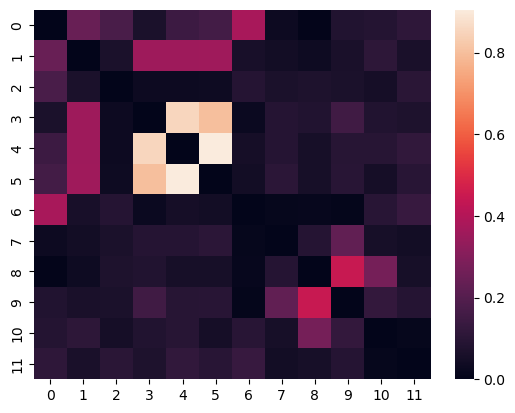

In [6]:
df_t = df_t.astype(float)
cor=abs(np.corrcoef(df_t,rowvar=False))
np.fill_diagonal(cor,0)
i,j=np.unravel_index(cor.argmax(),cor.shape)
print("Variables con mayor correlación (índices): ",i,j)
print("Variables con mayor correlación (nombre): ", df_t.columns[i], df_t.columns[j])
print("Valor de correlación absoluta: ",cor[i,j])
from seaborn import heatmap
heatmap(cor)

Como se pudo analizar en el código anterior, las variables que muestran una alta correlación corresponden a una variable de entrada (G2) y la variable de salida (G3). Si bien se identifica una correlación significativa entre ellas, esta relación es deseable y beneficiosa para el modelo predictivo, ya que indica que la calificación inicial (G2) tiene un fuerte poder predictivo sobre la calificación final (G3). Con esto en mente no se elimina ninguna variable del DataFrame.

5. En el siguiente bloque de código se crearon términos de interacción entre algunas variables del DataFrame.  Primero, se creó una copia del DataFrame original df_t_i para mantener los datos transformados sin modificaciones. Luego, se agregaron dos nuevas columnas: Edad:HorasDeEstudio (producto de las variables Edad y HorasDeEstudio_2)  y Reprobadas:Internet(producto de las variables Reprobadas e Internet_yes). Finalmente, se imprimieron las primeras cinco observaciones del DataFrame modificado. 


In [7]:
df_t_i = df_t.copy()
num_columns = len(df_t_i.columns)

df_t_i.insert(num_columns, "Edad:HorasDeEstudio", df_t_i.Edad * df_t_i.HorasDeEstudio_2)
df_t_i.insert(num_columns + 1, "Reprobadas:Internet", df_t_i.Reprobadas * df_t_i.Internet_yes)

print("DataFrame con términos de interacción:")
print(df_t_i.head(5))

DataFrame con términos de interacción:
   Edad  Reprobadas  Faltas    G1    G2    G3  Escuela_MS  Sexo_M  \
0  18.0         0.0     6.0   5.0   6.0   6.0         0.0     0.0   
1  17.0         0.0     4.0   5.0   5.0   6.0         0.0     0.0   
2  15.0         3.0    10.0   7.0   8.0  10.0         0.0     0.0   
3  15.0         0.0     2.0  15.0  14.0  15.0         0.0     0.0   
4  16.0         0.0     4.0   6.0  10.0  10.0         0.0     0.0   

   HorasDeEstudio_2  HorasDeEstudio_3  HorasDeEstudio_4  Internet_yes  \
0               1.0               0.0               0.0           0.0   
1               1.0               0.0               0.0           1.0   
2               1.0               0.0               0.0           1.0   
3               0.0               1.0               0.0           1.0   
4               1.0               0.0               0.0           0.0   

   Edad:HorasDeEstudio  Reprobadas:Internet  
0                 18.0                  0.0  
1              

6. En este bloque se construyó un modelo de regresión lineal múltiple para predecir la calificación final (G3) usando las demás variables. Primero, se dividieron los datos en entrenamiento (80%) y prueba (20%) para poder ajustar el modelo y evaluarlo. Luego, se creó y ajustó un modelo de regresión lineal ordinaria (OLS) con los datos de entrenamiento. Después, se utilizaron los datos de prueba para predecir las calificaciones y se compararon con los valores reales mediante un gráfico de dispersión, donde se puede observar qué tan cercanas están las predicciones a los resultados reales.

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     137.0
Date:                Thu, 28 Aug 2025   Prob (F-statistic):          3.75e-118
Time:                        08:12:14   Log-Likelihood:                -612.08
No. Observations:                 316   AIC:                             1252.
Df Residuals:                     302   BIC:                             1305.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3093    

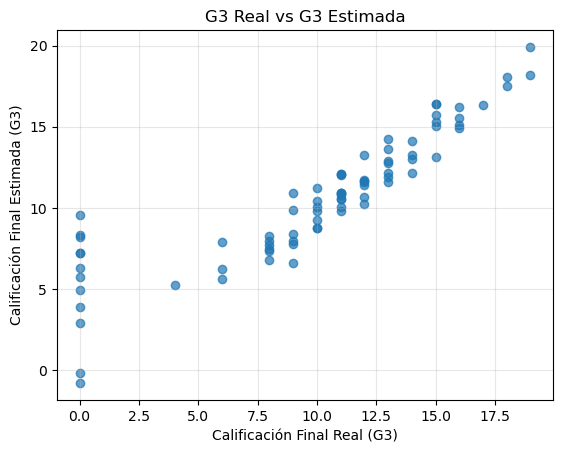

In [8]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(df_t_i.drop("G3", axis=1), df_t_i.G3, train_size=0.8)
model = sm.OLS(Y_train, sm.add_constant(X_train))
results = model.fit()
print(results.summary())
yHat = results.predict(sm.add_constant(X_test))
plt.scatter(Y_test, yHat, alpha=0.7)
plt.xlabel('Calificación Final Real (G3)')
plt.ylabel('Calificación Final Estimada (G3)')
plt.title('G3 Real vs G3 Estimada')
plt.grid(True, alpha=0.3)

Tomando en cuenta los resultados gráficos, se observa que los puntos entre los valores reales y estimados de G3 siguen una tendencia cercana a una recta diagonal, lo que indica que el modelo tiene capacidad predictiva para estimar las calificaciones finales en función de las variables incluidas en el dataframe df_t_i. Sin embargo, también se identifican ciertas desviaciones al inicio de la gráfica (valores bajos de G3), donde el modelo presenta mayores errores de predicción.

Analizando los resultados del modelo (resumen), se observa un R^1 de 0.822, lo cual indica un buen ajuste al modelo. Sin embargo, al examinar los p-values de los coeficientes, se identifica que la mayoría de las variables incluidas no son  significativas (mayores a 0.05). Las únicas variables que tiene un p-value menor a 0.05 (muestran significancia) son Faltas, G1, G2 y Sexo_M por lo que el modelo podría simplificarse con estas variables.